<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/TimeSeries_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#from sympy import Derivative
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 저장된 삼성전자(KR7005930003) 데이터 가져오기

data_path = '/content/drive/MyDrive/[Shared]K-Project/data/'
with open(data_path + 'initial_data1.json',"r") as json_file:
    json_data = json.load(json_file) 

df = pd.read_json(json_data['KR7005930003'], orient ='index') 
samsung = df.transpose()
samsung

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/10/29,005930,삼성전자,"69,800","71,200","71,600","69,700","416,690,821,990,000","3,841",18.17,"39,406",1.77,"2,994",4.29
1,2021/10/28,005930,삼성전자,"70,700","69,500","72,200","69,500","422,063,626,285,000","3,841",18.41,"39,406",1.79,"2,994",4.23
2,2021/10/27,005930,삼성전자,"70,100","71,000","71,000","70,000","418,481,756,755,000","3,841",18.25,"39,406",1.78,"2,994",4.27
3,2021/10/26,005930,삼성전자,"71,100","70,600","71,500","70,400","424,451,539,305,000","3,841",18.51,"39,406",1.80,"2,994",4.21
4,2021/10/25,005930,삼성전자,"70,200","69,900","70,600","69,500","419,078,735,010,000","3,841",18.28,"39,406",1.78,"2,994",4.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,1995/05/08,005930,삼성전자,"121,000","122,000","122,000","120,500","6,578,606,045,000",-,-,-,-,-,-
6707,1995/05/06,005930,삼성전자,"122,000","122,000","123,500","122,000","6,632,974,690,000",-,-,-,-,-,-
6708,1995/05/04,005930,삼성전자,"122,500","124,000","124,500","122,000","6,660,159,012,500",-,-,-,-,-,-
6709,1995/05/03,005930,삼성전자,"123,500","119,500","126,500","119,500","6,714,527,657,500",-,-,-,-,-,-


In [5]:
#시간순 재정렬.
samsung = samsung.sort_values(by=['TRD_DD'])
samsung.reset_index(drop=True,inplace=True)
samsung['TRD_DD']=pd.to_datetime(samsung['TRD_DD']) #datetime변환

#시가총액 str->float 데이터타입변환
samsung['MKTCAP'] = samsung['MKTCAP'].str.replace(',','').astype('float')

samsung

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,1995-05-02,005930,삼성전자,"119,500","121,000","121,000","118,500",6.497053e+12,-,-,-,-,-,-
1,1995-05-03,005930,삼성전자,"123,500","119,500","126,500","119,500",6.714528e+12,-,-,-,-,-,-
2,1995-05-04,005930,삼성전자,"122,500","124,000","124,500","122,000",6.660159e+12,-,-,-,-,-,-
3,1995-05-06,005930,삼성전자,"122,000","122,000","123,500","122,000",6.632975e+12,-,-,-,-,-,-
4,1995-05-08,005930,삼성전자,"121,000","122,000","122,000","120,500",6.578606e+12,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,2021-10-25,005930,삼성전자,"70,200","69,900","70,600","69,500",4.190787e+14,"3,841",18.28,"39,406",1.78,"2,994",4.26
6707,2021-10-26,005930,삼성전자,"71,100","70,600","71,500","70,400",4.244515e+14,"3,841",18.51,"39,406",1.80,"2,994",4.21
6708,2021-10-27,005930,삼성전자,"70,100","71,000","71,000","70,000",4.184818e+14,"3,841",18.25,"39,406",1.78,"2,994",4.27
6709,2021-10-28,005930,삼성전자,"70,700","69,500","72,200","69,500",4.220636e+14,"3,841",18.41,"39,406",1.79,"2,994",4.23


In [6]:
#7월부터 10월 20일까지만 추출
samsung01 = samsung[['TRD_DD','MKTCAP']]

samsung01= samsung01[(samsung01['TRD_DD']>='2021-07-01') & (samsung01['TRD_DD']<='2021-10-20')]
samsung01 = samsung01.rename(columns = {'TRD_DD':'x','MKTCAP':'y'})
samsung01.reset_index(drop=True,inplace=True)
samsung01

,x,y
0,2021-07-01,4.781796e+14
1,2021-07-02,4.775826e+14
2,2021-07-05,4.799705e+14
3,2021-07-06,4.847463e+14
4,2021-07-07,4.823584e+14
...,...,...
69,2021-10-14,4.143029e+14
70,2021-10-15,4.184818e+14
71,2021-10-18,4.190787e+14
72,2021-10-19,4.214666e+14


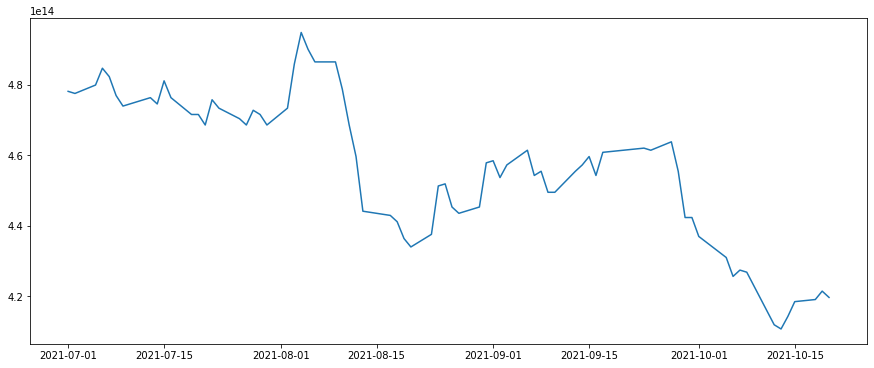

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])